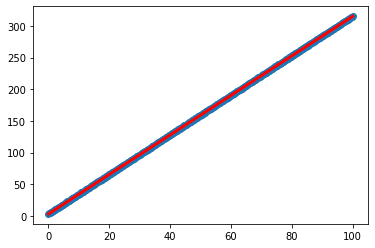

In [1]:
# 通过生成人工数据集合，基于TensorFlow实现y=3.1234*x+2.98线性回归
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph()
logdir = '/Users/liuchangling/workplace/tensor/log'

np.random.seed(3)

x_data = np.linspace(0,100,500)
# 0.2以内的噪声
y_data = 3.1234 * x_data + 2.98 + np.random.randn(*x_data.shape) * 0.2 
# 画y_data出来瞅瞅
plt.scatter(x_data, y_data)
plt.plot(x_data, 3.1234 * x_data + 2.98, color='red', linewidth=3)

3.807615230460922 14.65249188479935
epoch =  1 step =  20 , loss =  0.049220983
7.81563126252505 27.364959838810563
epoch =  1 step =  40 , loss =  0.63069445
11.823647294589179 39.52708555123868
epoch =  1 step =  60 , loss =  0.23197696
15.831663326653308 52.7069498160179
epoch =  1 step =  80 , loss =  0.61689574
19.839679358717436 65.37888437742943
epoch =  1 step =  100 , loss =  0.43941993
23.847695390781563 77.7348902748916
epoch =  1 step =  120 , loss =  0.08717703
27.855711422845694 89.64940213127933
epoch =  1 step =  140 , loss =  0.11274638
31.86372745490982 102.70258400608408
epoch =  1 step =  160 , loss =  0.04760155
35.87174348697395 115.14815244270025
epoch =  1 step =  180 , loss =  0.025708709
39.879759519038075 127.43500332589674
epoch =  1 step =  200 , loss =  0.03599084
43.88777555110221 140.01080119635077
epoch =  1 step =  220 , loss =  0.016589295
47.895791583166336 152.31986319209938
epoch =  1 step =  240 , loss =  0.08181088
51.90380761523046 165.221847483

11.823647294589179 39.52708555123868
epoch =  5 step =  2060 , loss =  0.06989551
15.831663326653308 52.7069498160179
epoch =  5 step =  2080 , loss =  0.107666016
19.839679358717436 65.37888437742943
epoch =  5 step =  2100 , loss =  0.25889736
23.847695390781563 77.7348902748916
epoch =  5 step =  2120 , loss =  0.07312495
27.855711422845694 89.64940213127933
epoch =  5 step =  2140 , loss =  0.113742545
31.86372745490982 102.70258400608408
epoch =  5 step =  2160 , loss =  0.047631517
35.87174348697395 115.14815244270025
epoch =  5 step =  2180 , loss =  0.025730733
39.879759519038075 127.43500332589674
epoch =  5 step =  2200 , loss =  0.035973474
43.88777555110221 140.01080119635077
epoch =  5 step =  2220 , loss =  0.016577505
47.895791583166336 152.31986319209938
epoch =  5 step =  2240 , loss =  0.08178469
51.90380761523046 165.2218474832255
epoch =  5 step =  2260 , loss =  0.0122956205
55.91182364729459 177.4893398185991
epoch =  5 step =  2280 , loss =  0.004462638
59.919839

31.86372745490982 102.70258400608408
epoch =  9 step =  4160 , loss =  0.047681484
35.87174348697395 115.14815244270025
epoch =  9 step =  4180 , loss =  0.025757663
39.879759519038075 127.43500332589674
epoch =  9 step =  4200 , loss =  0.035956115
43.88777555110221 140.01080119635077
epoch =  9 step =  4220 , loss =  0.016569648
47.895791583166336 152.31986319209938
epoch =  9 step =  4240 , loss =  0.08177596
51.90380761523046 165.2218474832255
epoch =  9 step =  4260 , loss =  0.0122888535
55.91182364729459 177.4893398185991
epoch =  9 step =  4280 , loss =  0.0044585615
59.91983967935872 190.3152909977771
epoch =  9 step =  4300 , loss =  0.00028998032
63.92785571142285 202.35747596369447
epoch =  9 step =  4320 , loss =  0.054874435
67.93587174348697 214.9924205366745
epoch =  9 step =  4340 , loss =  0.061413758
71.9438877755511 227.74890798431036
epoch =  9 step =  4360 , loss =  0.022787472
75.95190380761524 239.94377040576003
epoch =  9 step =  4380 , loss =  0.0013612965
79.

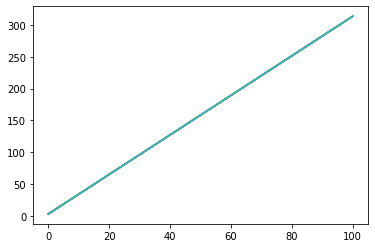

In [2]:
# 构建模型
x = tf.placeholder('float', name='x')
y = tf.placeholder('float', name='y')
w = tf.Variable(3.0, name='w') # 设置了一个较近的初始值
b = tf.Variable(3.0 ,name='b')

def model(w,x,b):
    return tf.multiply(w,x) + b

pred = model(w,x,b)

# 迭代次数（训练轮数）
train_epochs = 10
# 学习率（步长） 
learning_rate = 0.0001 # 步长太大会导致loss爆炸

# 损失函数（采用L2损失函数即MSE）
loss_function = tf.reduce_mean(tf.square(y - pred))

# 定义优化器（最小化损失优化）
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

sess = tf.Session();
sess.run(tf.global_variables_initializer())

step = 0 # 记录步数
loss_list = [] # 保存loss值
display_step = 20 # 每20样本显示一次

for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_function], feed_dict={x:xs,y:ys})
        loss_list.append(loss)
        step = step + 1;
        if step % display_step == 0 :
            print(xs,ys)
            print('epoch = ',epoch + 1,'step = ',step,', loss = ',loss)

    b0temp = b.eval(session = sess)
    w0temp = w.eval(session = sess)
    plt.plot(x_data, w0temp * x_data + b0temp)


w: 3.108074
b: 3.0181217


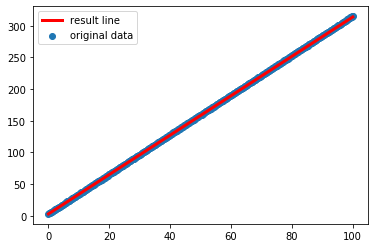

In [3]:
print('w:' , sess.run(w))
print('b:' , sess.run(b))
# 结果可视化
plt.scatter(x_data,y_data,label='original data')
plt.plot(x_data, sess.run(w) * x_data + sess.run(b), label='result line',color='red', linewidth=3)
plt.legend(loc=2)

# 10轮步长0.0001有点慢，步长太大会导致loss爆炸。所以这里增加轮数会得到更近的结果


In [4]:
# 进行预测
x_test = 5.79
predict = sess.run(pred, feed_dict = {x:x_test})
target = 3.1234 * x_test + 2.98
diff = target - predict

print('实际', target, '预测', predict, '差值', diff)

实际 21.064486000000002 预测 21.01387 差值 0.050615760742189764


In [5]:
# 写入计算图，释放资源
writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
writer.close()
sess.close()

<img src='./zuoye.png'>
